<a href="https://colab.research.google.com/github/snehahampapura/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing Dataset
dataset = pd.read_excel("/content/drive/MyDrive/Data/Online Retail.xlsx")
# dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/datasets/Online_Retail.xlsx - Online Retail.csv")

creating a copy of dataset

In [4]:
df = dataset.copy()

#**Data Exploration**

In [5]:
#First look of data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
#Taking a look at statistics of the columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Potential data reversal.**

*  The max and min value of Quantity are both 80995; it could represent a 
reversal of data entry. However, the issue is that both the initial and reversal entry are retained in the dataset. Further investigation is needed to understand the nature and determine the best way to manage such data reversal.

**Potential indication of cancellation orders from negative UnitPrice.**

*  It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. These transactions could represent cancelled orders by customers or bad-debt/write-off incurred by the business.

###Checking for Duplicate and Missing Values

In [8]:
df.shape

(541909, 8)

In [9]:
# checking for duplicate
len(df[df.duplicated()])

5268

In [10]:
df.drop_duplicates(keep = False, inplace = True)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
#Familiarise with the columns in the dataset and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531762 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531762 non-null  object        
 1   StockCode    531762 non-null  object        
 2   Description  530308 non-null  object        
 3   Quantity     531762 non-null  int64         
 4   InvoiceDate  531762 non-null  datetime64[ns]
 5   UnitPrice    531762 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      531762 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [13]:
# Finding Any Null Value Present in the data set
df.isnull().values.any()

True

In [14]:
# Total Number Of Count Of Null Values Present In The Respective Columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134995
Country             0
dtype: int64

In [15]:
df.isnull().sum()/len(df.index)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.273431
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.386357
Country         0.000000
dtype: float64

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(396767, 8)

#**Exploratory Data Analysis**

##Data Preprocessing

In [18]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 396767, dtype: datetime64[ns]

In [20]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396767 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396767 non-null  object        
 1   StockCode    396767 non-null  object        
 2   Description  396767 non-null  object        
 3   Quantity     396767 non-null  int64         
 4   InvoiceDate  396767 non-null  datetime64[ns]
 5   UnitPrice    396767 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      396767 non-null  object        
 8   TotalAmount  396767 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.3+ MB


In [22]:
df['month']=df['InvoiceDate'].dt.month_name()
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].dt.year
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [23]:
df.drop(columns=['InvoiceDate'],axis=1,inplace=True)

In [24]:
df.drop(columns=['year','minute'],axis=1,inplace=True)

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8


In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalAmount', 'month', 'day', 'hour'],
      dtype='object')

##Invoice Number

Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

Let us now look at the number of canceled orders in the data.

In [27]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,-27.50,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,-4.65,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,-19.80,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,-6.96,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,-6.96,December,Wednesday,10


In [28]:
print("Shape of cancelled order", cancel_order.shape)

Shape of cancelled order (8844, 11)


In [29]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

2.229016021997797

##Country

####Top 10 Order cancelled countries

In [30]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [31]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
# cancel_order_country_top10['Country_percent']= cancel_order_country_top10['InvoiceNo']*100/df['InvoiceNo'].count()
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7474
1,Germany,453
2,EIRE,247
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


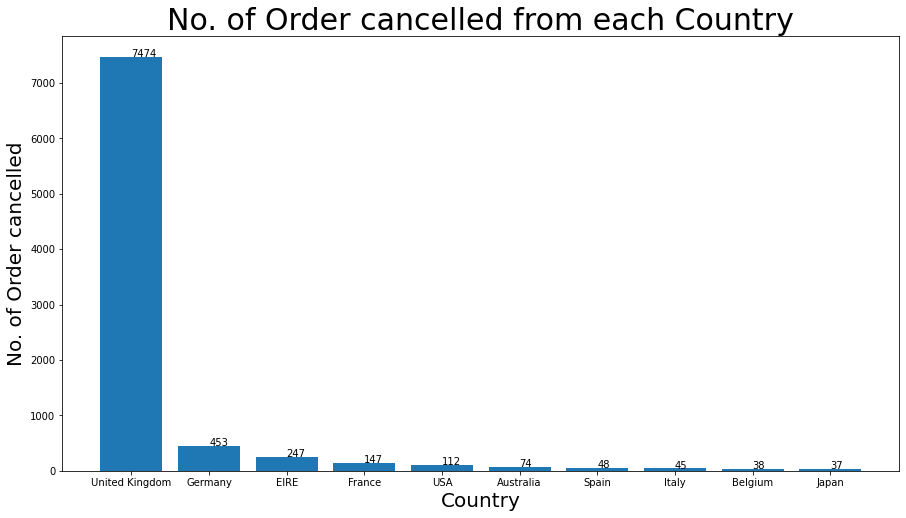

In [32]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [33]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [34]:
print("After removing the cancelled data the shape of final dataset is", df.shape)

After removing the cancelled data the shape of final dataset is (387923, 11)


####Top 10 countries with most orders

In [35]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [36]:
country_count.head()

,Country,InvoiceNo
0,Australia,1183
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


In [37]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)

In [38]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count()
Top_ten_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,344490,88.803706
1,Germany,9012,2.323141
2,France,8312,2.142693
3,EIRE,7218,1.860679
4,Spain,2475,0.638013
5,Netherlands,2363,0.609142
6,Belgium,2031,0.523558
7,Switzerland,1842,0.474837
8,Portugal,1445,0.372497
9,Australia,1183,0.304957


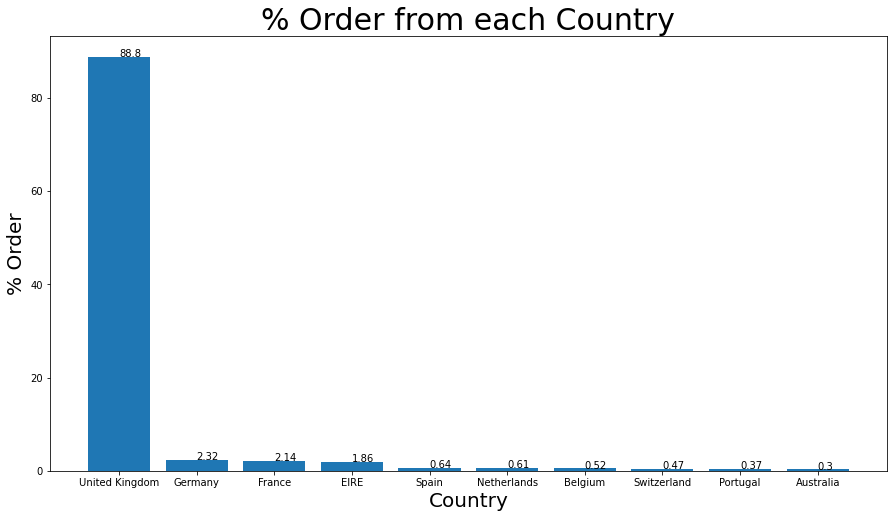

In [39]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

##CustomerID and TotalAmount

In [40]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = df.groupby(["CustomerID"]).TotalAmount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

,CustomerID,TotalAmount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


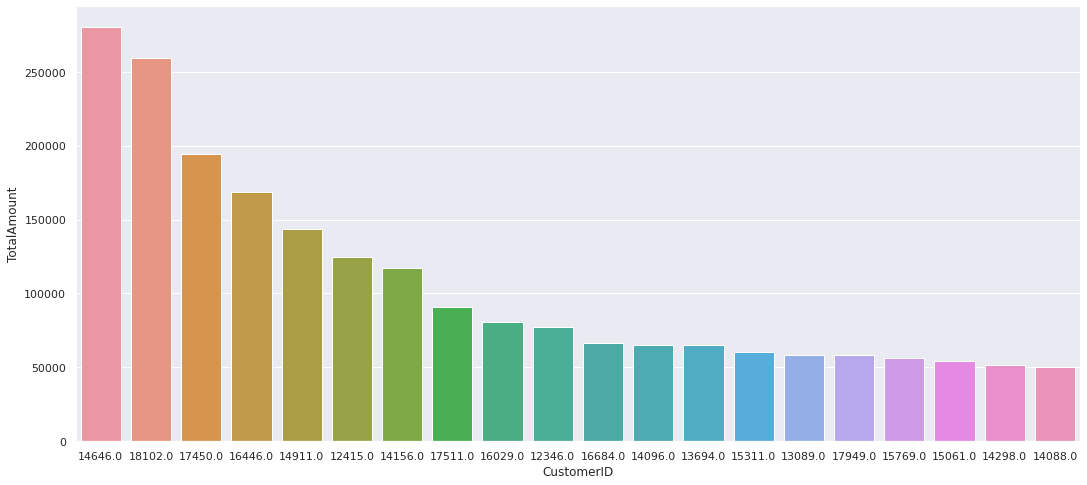

In [41]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="TotalAmount", data=PercentSales, order=PercentSales['CustomerID'])
plt.show()

##Day

In [42]:
day_df=df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,78514
1,Wednesday,67258
2,Tuesday,65072
3,Monday,63608
4,Sunday,59800
5,Friday,53671


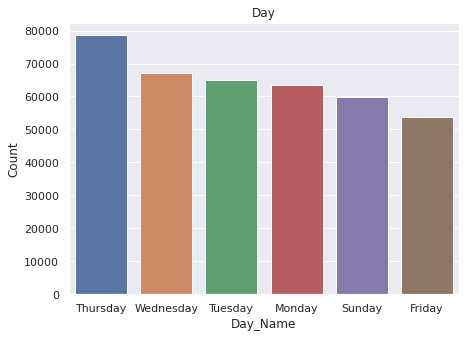

In [43]:
plt.figure(figsize=(7,5))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)
plt.show()

Most of the customers have purches the items in Tuesday,Wednesday and Thursday.

##Month

In [44]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,61914
1,October,48099
2,December,41999
3,September,39335
4,May,27840
5,June,26710
6,March,26592
7,August,26586
8,July,26344
9,April,22240


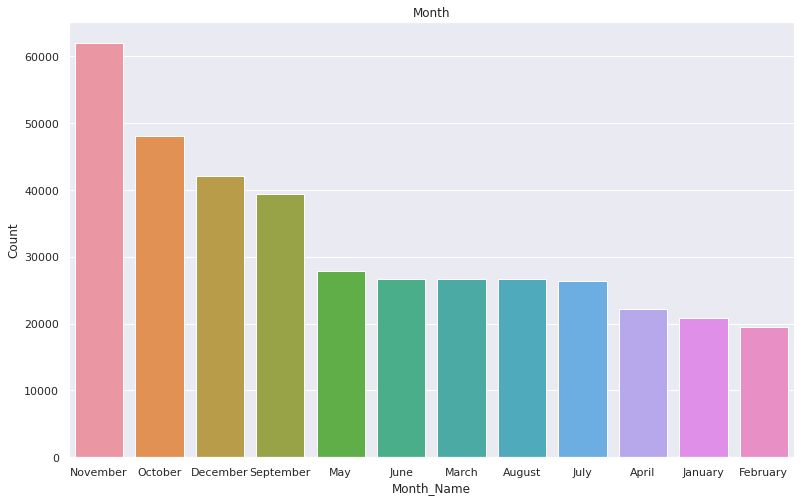

In [45]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

Most numbers of customers have purchaes the gifts in the month of September,October, November and December.

##Hour

In [46]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,69889
1,13,62081
2,14,52465
3,11,47718
4,15,44253
5,10,37569
6,16,23381
7,9,21912
8,17,12814
9,8,8685


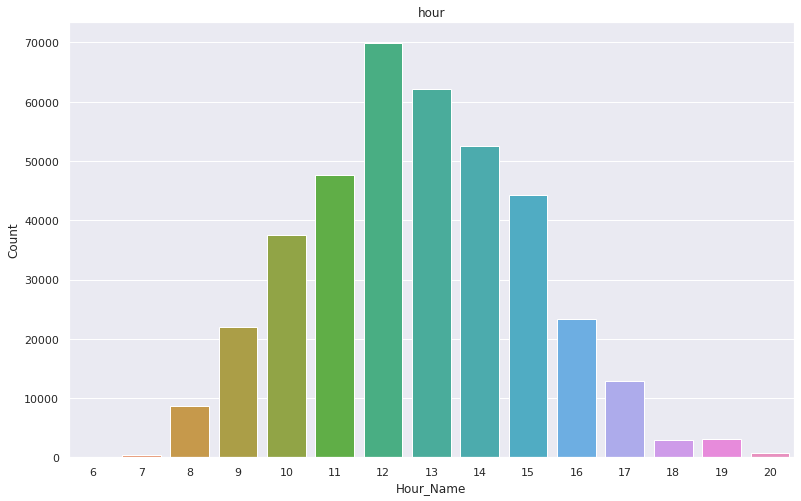

In [47]:
plt.figure(figsize=(13,8))
plt.title('hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

We can observe that most of the purchase happens during afternoon.

In [48]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16):
    return 'Afternoon'
  else:
    return 'Evening'

In [49]:
df['Time_type']=df['hour'].apply(time_type)

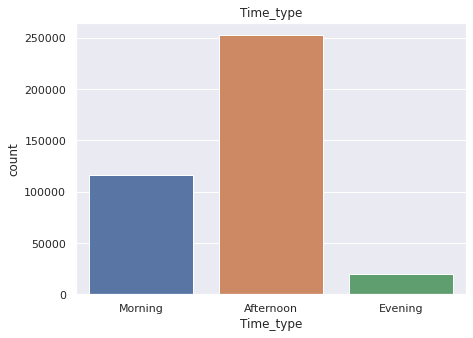

In [50]:
plt.figure(figsize=(7,5))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

##Description

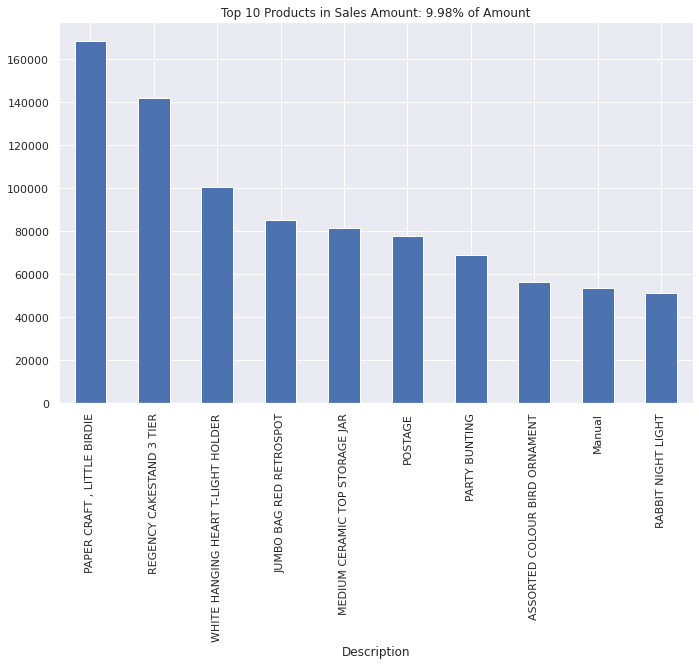

In [51]:
AmoutSum = df.groupby(["Description"]).TotalAmount.sum().sort_values(ascending = False)
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

In [52]:
df.shape

(387923, 12)